In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels import regression
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import coint
import seaborn
import math
import scipy.odr.odrpack as odrpack
%matplotlib inline
from sklearn.decomposition import PCA #For PCA Analysis
#listdf=pd.DataFrame(equity,columns=['List'])
#listdf.to_csv('list.csv')
import time 
import datetime

In [2]:
import os
os.getcwd()

'C:\\Users\\raymond.widjaja\\Desktop'

In [3]:
import os
import blpapi
from xbbg import blp

### For bloomberg API DATA RETRIEVAL

In [6]:
df=blp.bds(tickers='AS51 Index', flds=['INDX_MEMBERS'])
data=df['member_ticker_and_exchange_code'].reset_index(drop=True).tolist()
equity=[df +' Equity' for df in data]
#Based on Sector (Oil,Engineering,Industrial,Materials)
enindmat=['BHP','FMG','TCL','NCM','WPL','BXB','SYD','STO','S32','NST','EVN','AZJ','REH','ORG','QAN','ORI','BSL','ALX','CIM','SVW','SOL','CTX','ALD','SAR','BLD','WOR','QUB','MIN','OZL','ALQ','CWY','IPL','AWC','ILU','DOW','VEA','BPT','BKW'] 
port=[df +' AT Equity' for df in enindmat]
updatePort=['BHP','FMG','TCL','NCM','WPL','BXB','SYD','STO','S32','NST','EVN','AZJ','REH','ORG','QAN','ORI','BSL','ALX','CIM','SVW','SOL','ALD','SAR','BLD','WOR','QUB','MIN','OZL','ALQ','CWY','IPL','AWC','ILU','DOW','VEA','BPT','BKW']
port=[df +' AT Equity' for df in updatePort]

ConnectionError: Cannot connect to Bloomberg

In [1050]:
blp.bdh(tickers='SPX Index',flds=['open','high','low','last_price'],start_date='2012-01-01',end_date='2018-10-20')
#date_list = (df.iloc[:, 0]).tolist()
#columns = ['Date'] + equity_list
#clean_df = pd.DataFrame(np.arange(len(df) * (N+1)).reshape(len(df), N + 1), index=range(len(df)), columns=columns)
#clean_df['Date'] = date_list
#clean_df.index = date_list

ConnectionError: Cannot connect to Bloomberg

### Intraday data ASX200 Constituents 

In [17]:
dailyequity=pd.DataFrame() #cleaning the the intraday data retrieved from bloomberg
dailyequity=pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Pairs Trading\\AS51Index Intraday Historical Data macro.xlsm','Intra')

In [18]:
df=dailyequity.copy()
df

,BarTp,Trade,Unnamed: 2,BarTp.1,Trade.1,Unnamed: 5,BarTp.2,Trade.2,Unnamed: 8,BarTp.3,...,Trade.196,Unnamed: 590,BarTp.197,Trade.197,Unnamed: 593,BarTp.198,Trade.198,Unnamed: 596,BarTp.199,Trade.199
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QBE AT Equity,NaN,NaN,ALX AT Equity,NaN,NaN,GOZ AT Equity,NaN,NaN,GWA AT Equity,...,NaN,NaN,OSH AT Equity,NaN,NaN,SBM AT Equity,NaN,NaN,APT AT Equity,NaN
2,Dates,Close,NaN,Dates,Close,NaN,Dates,Close,NaN,Dates,...,Close,NaN,Dates,Close,NaN,Dates,Close,NaN,Dates,Close
3,2020-05-25 09:00:00,8.17,NaN,2020-05-25 09:00:00,6.84,NaN,2020-05-25 09:00:00,2.99,NaN,2020-05-25 09:00:00,...,4.18,NaN,2020-05-25 09:00:00,3.3,NaN,2020-05-25 09:00:00,3.17,NaN,2020-05-25 09:00:00,46.82
4,2020-05-25 09:15:00,8.24,NaN,2020-05-25 09:15:00,6.9,NaN,2020-05-25 09:15:00,2.99,NaN,2020-05-25 09:15:00,...,4.16,NaN,2020-05-25 09:15:00,3.3,NaN,2020-05-25 09:15:00,3.18,NaN,2020-05-25 09:15:00,46.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2020-10-14 11:59:00,2.81,NaN,2020-10-14 12:29:00,3.055,NaN,NaN,NaN
2545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2020-10-14 12:14:00,2.83,NaN,2020-10-14 12:44:00,3.05,NaN,NaN,NaN
2546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2020-10-14 12:29:00,2.83,NaN,2020-10-14 12:59:00,3.05,NaN,NaN,NaN
2547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2020-10-14 12:44:00,2.83,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Clean data from Blomoberg Intraday Excel Retrieval
df = df.drop([0]) #Drop first row which is a space 
df.index = range(len(df)) #Select the range row for reindex

N = 200 #Total Constituents in the Index Stock ASX200 

equity_list = []
for i in range(N):
    equity_list.append(df.iloc[0, i * 3]) #Row 3 of the Book2 file. Append the TICKER name to the list
print(equity_list) #Check if the output is correct and print its length too
print(len(equity_list))

df = df.drop([0, 1]) #drop the name and date row
df.index = range(len(df)) #reindex 
df = df.drop([len(df) - 1])#drop last value
print(df)

date_list = df.iloc[:2521,0].tolist()#add the benchmark for datelist. 2521 should be gone just [:,0]. But some nan value will create an error so i just set in manually at 2521 the end of the date of asset 1
columns = ['Date'] + equity_list


['QBE AT Equity', 'ALX AT Equity', 'GOZ AT Equity', 'GWA AT Equity', 'BKW AT Equity', 'PRN AT Equity', 'WEB AT Equity', 'BOQ AT Equity', 'ORA AT Equity', 'GNC AT Equity', 'WTC AT Equity', 'WES AT Equity', 'RRL AT Equity', 'SSM AT Equity', 'ANZ AT Equity', 'BPT AT Equity', 'NEC AT Equity', 'FLT AT Equity', 'RMD AT Equity', 'MPL AT Equity', 'OBL AT Equity', 'ALU AT Equity', 'ASB AT Equity', 'A2M AT Equity', 'NSR AT Equity', 'GEM AT Equity', 'CPU AT Equity', 'REA AT Equity', 'SOL AT Equity', 'WSA AT Equity', 'ANN AT Equity', 'WPL AT Equity', 'JBH AT Equity', 'TNE AT Equity', 'GOR AT Equity', 'PTM AT Equity', 'EVN AT Equity', 'IFL AT Equity', 'ABP AT Equity', 'RMS AT Equity', 'SUL AT Equity', 'BGA AT Equity', 'SIQ AT Equity', 'GPT AT Equity', 'CLW AT Equity', 'TGR AT Equity', 'IVC AT Equity', 'JHX AT Equity', 'URW AT Equity', 'CGC AT Equity', 'COE AT Equity', 'SFR AT Equity', 'FPH AT Equity', 'HLS AT Equity', 'PNV AT Equity', 'PMV AT Equity', 'PRU AT Equity', 'NAN AT Equity', 'NXT AT Equit

In [18]:
#2521 hould be len(df) but because the df of first include some NAN. Means by that there is more date in the other asset. so i fixed it manually as 2521
clean_df = pd.DataFrame(np.arange(2521 * (N+1)).reshape(2521, N + 1), index=range(2521), columns=columns)
clean_df['Date'] = date_list
clean_df.index = date_list
# clean_df = df.iloc[:, [0, 1]]
# clean_df.columns = ['Date', equity_list[0]]
for i in range(200):
    print(equity_list[i])
    right = df.iloc[:, [i * 3, i * 3 + 1]] #each asset date and closing price
    right.columns = ['Date', equity_list[i]] #change the column so its more readable
    right.index = right['Date'].tolist() #update the index
    value = math.nan
    for date in date_list: #check  first date_list we created if it is in each asset index
        # print(date)
        if date not in right.index: #if its not, update the value to nan
            clean_df.loc[date, equity_list[i]] = value #for the second till end loop, just update with the value before
        else:
            value = right.loc[date, equity_list[i]] #if valid, update the value with the value of the right
            clean_df.loc[date, equity_list[i]] = right.loc[date, equity_list[i]] #


QBE AT Equity
ALX AT Equity
GOZ AT Equity
GWA AT Equity
BKW AT Equity
PRN AT Equity
WEB AT Equity
BOQ AT Equity
ORA AT Equity
GNC AT Equity
WTC AT Equity
WES AT Equity
RRL AT Equity
SSM AT Equity
ANZ AT Equity
BPT AT Equity
NEC AT Equity
FLT AT Equity
RMD AT Equity
MPL AT Equity
OBL AT Equity
ALU AT Equity
ASB AT Equity
A2M AT Equity
NSR AT Equity
GEM AT Equity
CPU AT Equity
REA AT Equity
SOL AT Equity
WSA AT Equity
ANN AT Equity
WPL AT Equity
JBH AT Equity
TNE AT Equity
GOR AT Equity
PTM AT Equity
EVN AT Equity
IFL AT Equity
ABP AT Equity
RMS AT Equity
SUL AT Equity
BGA AT Equity
SIQ AT Equity
GPT AT Equity
CLW AT Equity
TGR AT Equity
IVC AT Equity
JHX AT Equity
URW AT Equity
CGC AT Equity
COE AT Equity
SFR AT Equity
FPH AT Equity
HLS AT Equity
PNV AT Equity
PMV AT Equity
PRU AT Equity
NAN AT Equity
NXT AT Equity
Z1P AT Equity
MSB AT Equity
CAR AT Equity
DMP AT Equity
CWY AT Equity
SEK AT Equity
NST AT Equity
CHC AT Equity
SKI AT Equity
XRO AT Equity
COL AT Equity
NHF AT Equity
MIN AT

In [29]:
clean_df.columns[clean_df.isnull().sum()>0] #Check for missing data 

Index([], dtype='object')

In [944]:
clean_df.to_csv("C:\\Users\\raymond.widjaja\\Desktop\\Pairs Trading\\15_min_clean_2_ASX200.csv",index=False)

### Intraday AS51 Index data

In [3]:
dailyAS51Index=pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Pairs Trading\\AS51Index Intraday Historical Data macro.xlsm','AS51')
dailyAS51Index.columns=['Date','AS51 Index']
dailyAS51Index=dailyAS51Index.drop([0,1,2])
dailyAS51Index.index = range(len(dailyAS51Index))
dailyAS51Index=dailyAS51Index.set_index(['Date'],drop=True)

In [4]:
dailyAS51Index

,AS51 Index
Date,
2020-05-25 09:00:00,5575.4
2020-05-25 09:15:00,5584.4
2020-05-25 09:30:00,5587.3
2020-05-25 09:45:00,5588.9
2020-05-25 10:00:00,5578.3
...,...
2020-10-14 12:15:00,6189.8
2020-10-14 12:30:00,6187.8
2020-10-14 12:45:00,6187.8


### Selecting Pairs

#### Pre process the data 

In [24]:
equityAS=pd.read_csv("C:\\Users\\raymond.widjaja\\Desktop\\Pairs Trading\\15_min_clean_ASX200.csv")

In [25]:
equityAS

,Date,QBE AT Equity,ALX AT Equity,GOZ AT Equity,GWA AT Equity,BKW AT Equity,PRN AT Equity,WEB AT Equity,BOQ AT Equity,ORA AT Equity,...,ING AT Equity,DHG AT Equity,FBU AT Equity,SAR AT Equity,DOW AT Equity,TWE AT Equity,SPK AT Equity,OSH AT Equity,SBM AT Equity,APT AT Equity
0,2020-05-25 09:30:00,8.190,6.860,3.000,2.640,13.630,1.1450,3.920,4.78,2.510,...,3.11,3.130,3.030,5.410,4.230,9.670,4.180,3.29,3.170,46.90
1,2020-05-25 09:45:00,8.150,6.900,3.020,2.670,13.650,1.1550,4.080,4.80,2.530,...,3.11,3.140,3.030,5.390,4.230,9.720,4.170,3.32,3.140,47.34
2,2020-05-25 10:00:00,8.150,6.900,3.010,2.660,13.640,1.1500,4.080,4.78,2.550,...,3.08,3.130,3.030,5.380,4.220,9.695,4.175,3.31,3.135,47.74
3,2020-05-25 10:15:00,8.150,6.900,2.980,2.670,13.680,1.1300,4.100,4.78,2.535,...,3.11,3.125,3.015,5.430,4.220,9.700,4.180,3.30,3.180,48.31
4,2020-05-25 10:30:00,8.150,6.890,2.970,2.650,13.610,1.1350,4.115,4.77,2.540,...,3.10,3.125,3.020,5.420,4.220,9.650,4.170,3.29,3.170,48.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2020-10-14 11:59:00,9.150,6.380,3.520,3.015,19.290,1.1275,4.010,6.69,2.500,...,3.06,3.910,3.975,6.130,4.865,9.270,4.370,2.81,3.060,96.48
2540,2020-10-14 12:14:00,9.170,6.370,3.520,3.025,19.305,1.1350,4.010,6.70,2.505,...,3.06,3.900,3.970,6.140,4.865,9.255,4.380,2.83,3.055,96.53
2541,2020-10-14 12:29:00,9.160,6.385,3.515,3.040,19.300,1.1300,4.010,6.69,2.510,...,3.06,3.920,3.970,6.155,4.875,9.240,4.365,2.83,3.055,96.56
2542,2020-10-14 12:44:00,9.145,6.400,3.510,3.040,19.310,1.1350,4.010,6.70,2.510,...,3.06,3.910,3.960,6.130,4.860,9.260,4.360,2.83,3.050,96.47


In [26]:
##Delete stock with more than 30% missing value. The remaining missing value substituted it with the last previous value
nan_list=[] ##Nan List
for i in range(1,len(equityAS.columns)): #loop the column to get all asset prices
    price_list=equityAS.iloc[:,i].tolist() #convert the price to list 
    for j in reversed(range(len(price_list))): #reverse the price from the oldest to the newest 
        if math.isnan(price_list[j]): #if the pricelist is NAN, break and append J directly
            break
    nan_list.append(j) #If no error, than nan value would be 0 appended
threshold=len(equityAS)*0.3 #Threshold for missing value
columns=['Date']
max_num=-1

for i in range(1, len(equityAS.columns)): #loop the column range again
    name = equityAS.columns[i] #put the column name into a name
    if nan_list[i-1] < threshold: #if the NAN of the stock is lower than the treshold
        if nan_list[i-1] > max_num:# and greater than -1
            max_num = nan_list[i-1] #change the maximum number of error below the treshold
        columns.append(name) #append the name of the valid daata to columns

equityAS = equityAS.loc[:, columns] #update the new data 
#Drop some row
if max_num > -1:
    equityAS = equityAS.drop(range(max_num + 1))#remove the row of the max(missing data) for all equity
#Split the equity names so just retain the symbol without AT equity
columns = []
for name in equityAS.columns:
    columns.append(name.split(' ')[0])
##Final Stock
equityAS.columns = columns #rename the column without the AT EQUITY just symbol
equityAS.index = range(len(equityAS)) #reindex it again from 0
##Update the stock list (remove thet AT Equity from bloomberg)
stock_list = equityAS.columns
stock_list = stock_list[1::]
log_stock_list = []

In [28]:
#log price
for stock in stock_list:
    log_stock_list.append('log_' + stock)
    equityAS['log_' + stock] = equityAS[stock].apply(lambda x: math.log(x)) #add the log price column in the equityAS


In [30]:
equityAS.loc[:,['Date']+log_stock_list]

,Date,log_QBE,log_ALX,log_GOZ,log_GWA,log_BKW,log_PRN,log_WEB,log_BOQ,log_ORA,...,log_ING,log_DHG,log_FBU,log_SAR,log_DOW,log_TWE,log_SPK,log_OSH,log_SBM,log_APT
0,2020-06-30 10:14:00,2.187174,1.896119,1.192406,1.018847,2.749832,0.154865,1.190888,1.826161,0.916291,...,1.169381,1.193922,1.242713,1.666763,1.481605,2.358965,1.446919,1.137833,1.144223,4.089500
1,2020-06-30 10:29:00,2.192212,1.894617,1.190888,1.033184,2.751110,0.148420,1.187843,1.827770,0.912283,...,1.167827,1.199965,1.242713,1.670533,1.481605,2.354703,1.448095,1.139434,1.147402,4.093844
2,2020-06-30 10:44:00,2.184927,1.897620,1.187843,1.022451,2.752386,0.144100,1.186318,1.829376,0.912283,...,1.166271,1.202972,1.235471,1.668650,1.479329,2.355178,1.448095,1.139434,1.147402,4.090504
3,2020-06-30 10:59:00,2.188296,1.895368,1.184790,1.009781,2.754297,0.137586,1.183260,1.829376,0.912283,...,1.166271,1.202972,1.241269,1.671473,1.479329,2.355652,1.448095,1.147402,1.148988,4.091841
4,2020-06-30 11:14:00,2.189416,1.894617,1.184790,1.015231,2.757475,0.141933,1.184790,1.830980,0.916291,...,1.167827,1.208960,1.244155,1.672413,1.483875,2.356600,1.449269,1.153732,1.153732,4.101155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,2020-10-14 11:59:00,2.213754,1.853168,1.258461,1.103600,2.959587,0.120003,1.388791,1.900614,0.916291,...,1.118415,1.363537,1.380025,1.813195,1.582067,2.226783,1.474763,1.033184,1.118415,4.569336
1912,2020-10-14 12:14:00,2.215937,1.851599,1.258461,1.106911,2.960364,0.126633,1.388791,1.902108,0.918289,...,1.118415,1.360977,1.378766,1.814825,1.582067,2.225164,1.477049,1.040277,1.116780,4.569854
1913,2020-10-14 12:29:00,2.214846,1.853951,1.257040,1.111858,2.960105,0.122218,1.388791,1.900614,0.920283,...,1.118415,1.366092,1.378766,1.817265,1.584120,2.223542,1.473618,1.040277,1.116780,4.570165
1914,2020-10-14 12:44:00,2.213207,1.856298,1.255616,1.111858,2.960623,0.126633,1.388791,1.902108,0.920283,...,1.118415,1.363537,1.376244,1.813195,1.581038,2.225704,1.472472,1.040277,1.115142,4.569232


### Training and Testing Data

In [242]:
log_df = equityAS.loc[:, ['Date'] + log_stock_list] #select the date with the log price
log_df.columns = columns
# split the data into training data and test data
training_df = log_df.loc[range(int(len(log_df) * 1 / 2)), :]
test_df = log_df.loc[range(int(len(log_df) * 1 / 2), len(log_df)), :]

In [32]:
#uniquess possible pairs
def get_symb_pairs(symbList):
    symbPairs = []
    i = 0  
    #iterate through the list and create all possible combinations of ticker pairs - append the pairs to the "symbPairs" list
    while i < len(symbList)-1:
        j = i + 1
        while j < len(symbList):
            symbPairs.append([symbList[i],symbList[j]])
            j += 1
        i += 1
    #iterate through the newly created list of pairs and remove any pairs made up of two identical tickers
    for i in symbPairs:
        if i[0] == i[1]:
            symbPairs.remove(i) 
    #create a new empty list to store only unique pairs        
    symbPairs2 = []
    #iterate through the original list and append only unique pairs to the new list 
    for i in symbPairs:
        if i not in symbPairs2:
            symbPairs2.append(i)

    return symbPairs2

###  1st Selection Process (Correlation >0)

In [33]:
#Selected Sector List
sector_list=['Consumer Discretionary','Consumer Staples','Energy','Financials','Health Care','Industrials','Information Technology','Materials','Real Estate','Telecommunication Services','Utilities','Communication Services']
num = 0
selected_pairs_from_corr = []
pairs_sector_dict = {}
corr_dict = {}
possible_pairs={}
# Select pairs in the same sector from correlation criteria
for sector_name in sector_list:
    df1 = pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\Pairs Trading\\ASX200 Sector List.xlsx",sector_name)
    equity_list = df1['Symbol'].tolist() #List all the equity
    num = num + len(equity_list)
    name_list = []
    for name in equity_list:
        if name in columns: #if name is in the columns of our data equityAS
            name_list.append(name) #append to the name list
    possible_pairs[sector_name]=len(get_symb_pairs(name_list))
    sector_df = training_df.loc[:, name_list] #select the sector df from the training df based on the namelsit
    
    # Correlation Criteria > 0.85
    corr_df = sector_df.corr()
    corr_df.style.background_gradient(cmap='coolwarm') 

    for i in range(len(name_list)):
        for j in range(i+1, len(name_list)):
            if abs(corr_df.loc[name_list[i], name_list[j]]) > 0.85:
                selected_pairs_from_corr.append(name_list[i] + '/' + name_list[j])
                corr_dict[name_list[i] + '/' + name_list[j]] = corr_df.loc[name_list[i], name_list[j]]
                pairs_sector_dict[name_list[i] + '/' + name_list[j]] = sector_name
#24 Consumer
#1 CS 7 FINANCIAL 4 HEALTH CARE 1 INFO 37 MATERIALS 12 RE 2 COMMUNI

## Another Section for LSTM method

In [156]:
def find_cointegrated_pairs(data):## Cointegration Process Visualization
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = {}
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs[(keys[i], keys[j])] = result
    return score_matrix, pvalue_matrix, pairs
#scores, pvalues, pairs = find_cointegrated_pairs(training_df[name_list])
#seaborn.heatmap(pvalues, xticklabels = training_df[name_list].columns, yticklabels = training_df[name_list].columns, cmap = 'plasma', mask = (pvalues >= 0.05))

In [106]:
sector_list #Also error dont know why, loc function dont except .loc index kind f type
for sector_name in sector_list:
    df1 = pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\Pairs Trading\\ASX200 Sector List.xlsx",sector_name)
    listnm=['Date']
    for name in df1['Symbol'].tolist():
        listnm.append(name)
    pairsvis=training_df.loc[:,listnm]
  

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [143]:
scores, pvalues, pairs = find_cointegrated_pairs(training_df.iloc[:,1:])


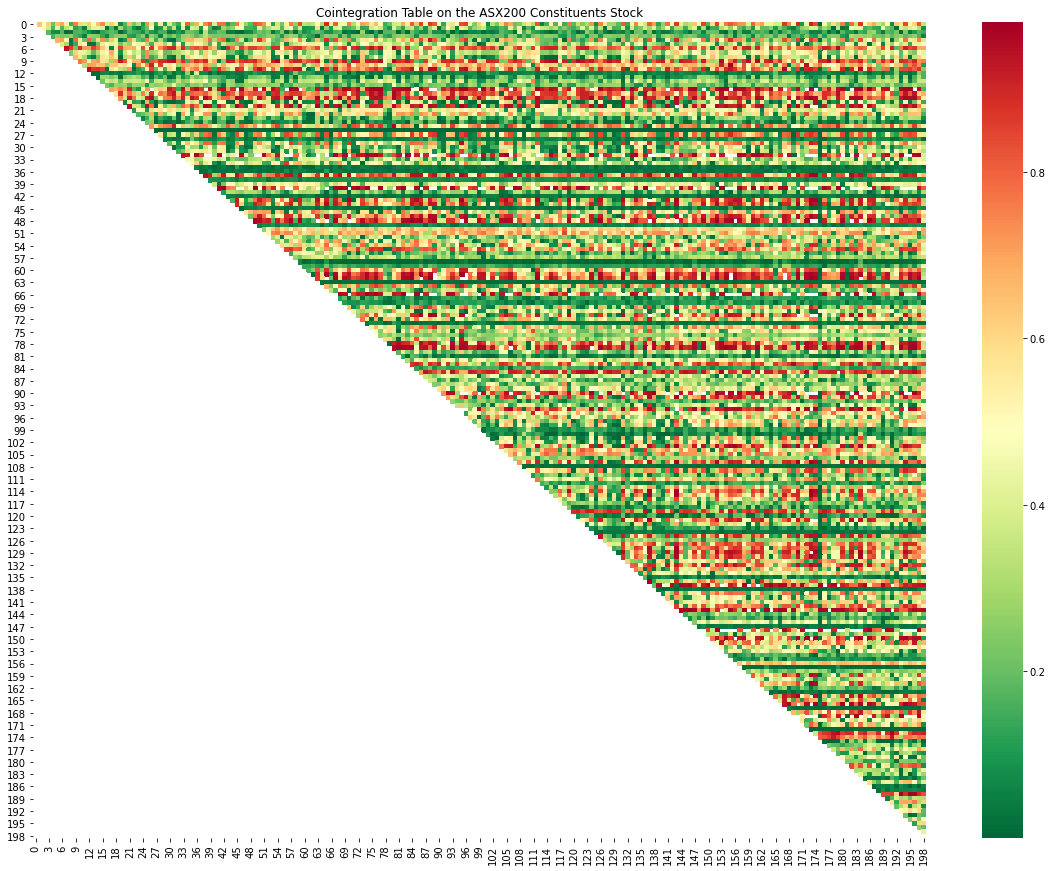

In [144]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)
seaborn.heatmap(pvalues,  cmap='RdYlGn_r', mask = (pvalues >= 0.98),ax=ax)
plt.title('Cointegration Table on the ASX200 Constituents Stock')
plt.show()

In [151]:
pairs_data = {key:value[1]  for (key, value) in pairs.items()}
pairs_data = sorted(pairs_data.items(), key=lambda x: x[1])
pairs_data[:10]

[(('PDL', 'LLC'), 1.1612346553454715e-06),
 (('MPL', 'GPT'), 3.6351812961954557e-06),
 (('MPL', 'DXS'), 4.683296710729491e-06),
 (('GUD', 'CSR'), 6.9324948407228436e-06),
 (('GMG', 'UMG'), 7.097445647322245e-06),
 (('MPL', 'ALQ'), 1.1067972223187484e-05),
 (('MPL', 'MIN'), 1.6601528766054968e-05),
 (('MPL', 'AMP'), 1.9103868298139085e-05),
 (('MPL', 'FMG'), 2.274790584373247e-05),
 (('NXT', 'WHC'), 2.5882070996741144e-05)]

In [327]:
pairs_data

[(('PDL', 'LLC'), 1.1612346553454715e-06),
 (('MPL', 'GPT'), 3.6351812961954557e-06),
 (('MPL', 'DXS'), 4.683296710729491e-06),
 (('GUD', 'CSR'), 6.9324948407228436e-06),
 (('GMG', 'UMG'), 7.097445647322245e-06),
 (('MPL', 'ALQ'), 1.1067972223187484e-05),
 (('MPL', 'MIN'), 1.6601528766054968e-05),
 (('MPL', 'AMP'), 1.9103868298139085e-05),
 (('MPL', 'FMG'), 2.274790584373247e-05),
 (('NXT', 'WHC'), 2.5882070996741144e-05),
 (('ILU', 'UMG'), 3.699680314286457e-05),
 (('UMG', 'FBU'), 3.959519313027637e-05),
 (('NXT', 'PDL'), 4.560917479376228e-05),
 (('CWY', 'PPT'), 4.895878127731013e-05),
 (('UMG', 'BAP'), 5.77073121740517e-05),
 (('UMG', 'CKF'), 6.41701820537238e-05),
 (('NXT', 'AMP'), 6.546257226108177e-05),
 (('QUB', 'SAR'), 6.900754432415317e-05),
 (('WHC', 'UMG'), 7.011200529958606e-05),
 (('GPT', 'UMG'), 7.129985143839308e-05),
 (('VCX', 'SYD'), 8.060634151759068e-05),
 (('SIQ', 'RHC'), 8.078702881655342e-05),
 (('NXT', 'UMG'), 9.344885894215917e-05),
 (('PDL', 'DOW'), 0.000102392

## Some Technical Indicator

In [ ]:
#1. MOM Indicator
RSI Relative Strength Index 
MOM Momentum

#4. Trend Indicator
EMA
MACD


In [247]:
training_df[stock_list]

,QBE,ALX,GOZ,GWA,BKW,PRN,WEB,BOQ,ORA,GNC,...,ING,DHG,FBU,SAR,DOW,TWE,SPK,OSH,SBM,APT
0,2.187174,1.896119,1.192406,1.018847,2.749832,0.154865,1.190888,1.826161,0.916291,1.415853,...,1.169381,1.193922,1.242713,1.666763,1.481605,2.358965,1.446919,1.137833,1.144223,4.089500
1,2.192212,1.894617,1.190888,1.033184,2.751110,0.148420,1.187843,1.827770,0.912283,1.410987,...,1.167827,1.199965,1.242713,1.670533,1.481605,2.354703,1.448095,1.139434,1.147402,4.093844
2,2.184927,1.897620,1.187843,1.022451,2.752386,0.144100,1.186318,1.829376,0.912283,1.410987,...,1.166271,1.202972,1.235471,1.668650,1.479329,2.355178,1.448095,1.139434,1.147402,4.090504
3,2.188296,1.895368,1.184790,1.009781,2.754297,0.137586,1.183260,1.829376,0.912283,1.413423,...,1.166271,1.202972,1.241269,1.671473,1.479329,2.355652,1.448095,1.147402,1.148988,4.091841
4,2.189416,1.894617,1.184790,1.015231,2.757475,0.141933,1.184790,1.830980,0.916291,1.415853,...,1.167827,1.208960,1.244155,1.672413,1.483875,2.356600,1.449269,1.153732,1.153732,4.101155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,2.368373,1.837370,1.177115,0.918289,2.845491,0.154865,1.264127,1.783391,0.852285,1.465568,...,1.226712,1.252763,1.116780,1.690096,1.444563,2.296064,1.501853,1.096944,1.223775,4.380651
954,2.368841,1.841343,1.178655,0.922273,2.847812,0.157004,1.266948,1.786747,0.852285,1.465568,...,1.232560,1.255616,1.116780,1.690096,1.446919,2.297070,1.504077,1.100278,1.223775,4.385084
955,2.369776,1.840550,1.177115,0.926241,2.847232,0.152721,1.266948,1.786747,0.854415,1.470176,...,1.234017,1.247032,1.118415,1.689173,1.446919,2.298577,1.506297,1.100278,1.226712,4.382776
956,2.367905,1.840550,1.177115,0.926241,2.846071,0.152721,1.261298,1.786747,0.854415,1.465568,...,1.235471,1.247032,1.116780,1.689173,1.442202,2.296567,1.506297,1.100278,1.220830,4.378771


### =======================================================================

In [173]:
def f(B, x):
    '''Linear function y = m*x + b'''
    return B[0]*x + B[1]
def test_meanrevert(df): #df is spread
    #Test 1: ADF
    cadf=ts.adfuller(df,regression='c',autolag='AIC')
    
    #Test 2: Hurst Exponent for sure
    # Create the range of lag values
    lags = range(2, 100)

    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(df[lag:], df[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    hurst= poly[0]*2.0
    return (cadf[1],hurst)
#Re select pair based on the cointegration approach
vol_dict = {} #Dictionary for Volatility
max_vol = 0
vol_list = [] #list of volatility
pairs_testvalue_dict = {} #dictionary for the test value
for pairs in selected_pairs_from_corr: 
    stock1 = pairs.split('/')[0] #stock A
    stock2 = pairs.split('/')[1] #stock B
    print(stock1, stock2)
    X = training_df.loc[:, stock1].tolist()
    Y = training_df.loc[:, stock2].tolist()
   #Test for Volatility

    # Use Orthogonal Distance Regression to determine the Hedge ratio
    linear = odrpack.Model(f)
    mydata = odrpack.RealData(X, Y)
    myodr = odrpack.ODR(mydata, linear, beta0=[1., 2.])
    myoutput = myodr.run()

    intercept = myoutput.beta[1]
    slope = myoutput.beta[0]

    residual = []
    for i in range(len(X)):
        residual.append(Y[i] - slope * X[i] - intercept)
    #Test for Cointegration
    result = ts.adfuller(residual)
    AIC_test_value = result[0]
    p_value = result[1]

    vol_dict[pairs] = np.std(residual)
    vol_list.append(np.std(residual))

    pairs_testvalue_dict[pairs] = AIC_test_value #lower AIC values indicate a better-fit to the model
    #Aic: Fined technique based on in-sample fit to estimate the likelihood of a model to predict/estimate the future values. A good model is the one that has minimum AIC among all the other models.
    #Negative AIC means lest value loss
    sorted_by_value = sorted(pairs_testvalue_dict.items(), key=lambda x: x[1], reverse=False) #dict item give the [pairs,the test value] and key x[1] means sort based on the aic value
    sorted_by_vol = sorted(vol_dict.items(), key=lambda x: x[1], reverse=True) #sort based on the volatility in descending order
#when dict item is sorted it become sciptable lol

APE ARB
APE ALL
APE SUL
ARB ALL
ARB CKF
ARB DMP
ARB HVN
ARB JBH
ARB SUL
ARB WES
ALL HVN
BAP JBH
BAP SUL
CKF JBH
CTD FLT
CTD WEB
DMP JBH
DMP WES
FLT WEB
HVN JBH
HVN SUL
JBH SUL
JBH WES
COL WOW
AMP MPL
ANZ NAB
ANZ WBC
BOQ NAB
BOQ WBC
IAG MPL
NAB WBC
AVH CUV
AVH PNV
CUV PME
CUV PNV
APT APX
BHP FMG
BHP ILU
BHP MIN
BSL JHX
BSL ORI
BKW FMG
BKW ILU
BKW JHX
BKW MIN
BKW ORI
BKW OZL
FMG ILU
FMG LYC
FMG MIN
FMG ORA
FMG OZL
GOR SAR
ILU JHX
ILU LYC
ILU MIN
ILU ORI
ILU OZL
JHX LYC
JHX MIN
JHX ORI
LYC MIN
LYC ORI
LYC OZL
MIN ORA
MIN ORI
MIN OZL
NCM RRL
NCM RSG
NST RRL
NST SLR
ORA OZL
RRL SLR
CHC CLW
CHC GMG
CLW GMG
DXS GMG
DXS GPT
GMG GPT
GPT MGR
GPT URW
GOZ SCG
LLC SCG
LLC VCX
SCG VCX
NEC NWS
NWS REA


In [174]:
#Top Pairs
Top_pairs = []
print(max(vol_list))
print(np.mean(vol_list))
print(np.median(vol_list))
print(np.min(vol_list))

# print(sorted_by_value)

#Rank the pairs by the volatility. If  the volatility is higher than around the mean and median
for pairs, vol in sorted_by_vol:
    if vol >= 0.026:
        Top_pairs.append((pairs, vol))
testvalue_dict1={}
#Sorted the pair by the ADF-test value ascendingly based on the top pair in volatiltiy ranking scheme
for pairs, vol in Top_pairs:
    testvalue_dict1[pairs] = pairs_testvalue_dict[pairs]
    # print(pairs, vol_dict[pairs], test_value)

sorted_by_testvalue = sorted(testvalue_dict1.items(), key=lambda x: x[1], reverse=False)
# print(sorted_by_vol)

print(sorted_by_testvalue[:10])
Top_pairs = sorted_by_testvalue[:10]

0.054817599473811256
0.026830985204157817
0.024314338010821546
0.006463955843650132
[('GOZ/SCG', -4.468065327273938), ('ORA/OZL', -4.304669498232336), ('CKF/JBH', -4.283639073592157), ('RRL/SLR', -4.201341930904879), ('ILU/MIN', -4.098758453239515), ('ILU/LYC', -3.9822219041368254), ('BSL/JHX', -3.431409156517196), ('BKW/JHX', -3.384732528678332), ('FLT/WEB', -3.3685820741773), ('DMP/JBH', -3.2482770707417066)]


## Pairs for our Strategy

In [246]:
info_df = pd.DataFrame(np.arange(10 * 5).reshape(10, 5), index= range(10), columns = ['Rank','Pairs', 'Correlation', 'Spread Volatility', 'Cointegration'])
num = 0
for pairs, test_value in Top_pairs:
    info_df.loc[num, 'Pairs'] = pairs
    info_df.loc[num, 'Correlation'] = corr_dict[pairs]
    info_df.loc[num, 'Spread Volatility'] = vol_dict[pairs]
    info_df.loc[num, 'Cointegration'] = test_value
    info_df.loc[num, 'Rank'] = num + 1
    num = num + 1
info_df

,Rank,Pairs,Correlation,Spread Volatility,Cointegration
0,1,GOZ/SCG,0.850954,0.027289,-4.468065
1,2,ORA/OZL,-0.862956,0.043875,-4.304669
2,3,CKF/JBH,0.863144,0.026717,-4.283639
3,4,RRL/SLR,0.870681,0.033847,-4.201342
4,5,ILU/MIN,0.951291,0.030114,-4.098758
5,6,ILU/LYC,0.906232,0.051210,-3.982222
6,7,BSL/JHX,0.867439,0.027570,-3.431409
7,8,BKW/JHX,0.878464,0.027309,-3.384733
8,9,FLT/WEB,0.937000,0.028283,-3.368582
9,10,DMP/JBH,0.850605,0.027257,-3.248277


### PAIRS FOR NORMAL COINTEGRATION

In [172]:
num=0
coint_df=pd.DataFrame(np.arange(10*3).reshape(10,3),index=range(10),columns=['Rank','Pairs','CointPval'])
for pairs,pvalue in pairs_data[:10]:
    coint_df.loc[num,'Pairs']=pairs[0]+"/"+pairs[1]
    coint_df.loc[num,'CointPval']=pvalue
    coint_df.loc[num,'Rank']=num+1
    num+=1
coint_df

,Rank,Pairs,CointPval
0,1,PDL/LLC,0.000001
1,2,MPL/GPT,0.000004
2,3,MPL/DXS,0.000005
3,4,GUD/CSR,0.000007
4,5,GMG/UMG,0.000007
5,6,MPL/ALQ,0.000011
6,7,MPL/MIN,0.000017
7,8,MPL/AMP,0.000019
8,9,MPL/FMG,0.000023
9,10,NXT/WHC,0.000026


## Trading Strategy

In [310]:
#PnL Calculation. opn=[1,1.5,2,2.5] close=[-0.2,-0.1,0,0,1,0,2] ,stoploss Slope is static based on the TLS regression
#opn meangs when to enter and close mean when to close our position
def pnl(X,Y,slope,intercept,sd,opn,close,stoploss,tag,amount):  
   
    residual=[]
    for i in range(len(X)):
        residual.append(Y[i]-slope*X[i]-intercept)
    signal=0
    entry_time=[]
    exit_time=[]
    trade_style=[]
    success=0
    trade_day=0
    returnlist=[]
    f
    for i in range(len(X)):
        if signal==0: #No signal at the moment
            returnlist.append(0)
            if Y[i]-slope*X[i]-intercept>=opn*sd:
                signal=1
            if Y[i]-slope*X[i]-intercept<=-opn*sd:
                signal=-1
        else:
            if signal==1:
                returnlist.append(0)
                if (Y[i] - slope * X[i] - intercept <= opn * sd) and (Y[i] - slope * X[i] - intercept >= close * sd):
                    signal = 2
                    entry_time.append(i)
            else:
                if signal == -1:
                    returnlist.append(0)
                    if (Y[i] - slope * X[i] - intercept >= -opn * sd) and (Y[i] - slope * X[i] - intercept <= -close * sd):
                        signal = -2
                        entry_time.append(i)
                else:
                    if signal == 2:
                        trade_day += 1
                        returnlist.append((residual[i - 1] - residual[i]) / (1 + abs(slope))) #Short Y long X
                        if Y[i] - slope * X[i] - intercept <= close * sd:
                            signal = 0
                            exit_time.append(i)
                            trade_style.append('Positive')
                            success+= 1
                        else:
                            if Y[i] - slope * X[i] - intercept >= stoploss * sd:  
                                signal = 0
                                exit_time.append(i)
                                trade_style.append('stop_loss_Positive') #close our position if the price deviate too far
                    else:
                        if signal==-2:
                            returnlist.append((residual[i] - residual[i-1]) / (1 + abs(slope))) #Short X long Y
                            trade_day+=1
                            if  Y[i] - slope * X[i] - intercept >= -close * sd:
                                signal=0
                                exit_time.append(i)
                                trade_style.append('Negative')
                                success+=1
                            else:
                                if Y[i] - slope * X[i] - intercept <= -stoploss * sd:
                                    signal=0
                                    exit_time.append(i)
                                    trade_style.append('stop_loss_negative')
    #if there is still open positions in the market
    if signal==2:
        exit_time.append(i)
        trade_style.append('positive')
    if signal==-2:
        exit_time.append(i)
        trade_style.append('negative')
    #Done                           
    #Entry time to calculate number of success
    Num_of_Trade1=len(entry_time)
    if Num_of_Trade1 == 0:
        success_rate1 = 0
    else:
        success_rate1 = success / Num_of_Trade1
    trade_frequency1 = trade_day / len(X)
    #Sharpe Ratio calculation for High Frequence Trading
    #Annual Risk free rate= 0.03 equivalent to 15-min interval Risk free rate  0.03/252/24/4 
    Sharpe_Ratio1 = (np.mean(returnlist) - 0.02 / 252 / 24 / 4) / np.std(returnlist)
    Sharpe_Ratio1 = Sharpe_Ratio1 *np.sqrt(252*4) #Annualized sharpe ratio from 15min return interval
    #input the residual number  when you entry and exit
    entry_res=[]
    exit_res=[]
    for i in entry_time:
        entry_res.append(residual[i])
    for i in exit_time:
        exit_res.append(residual[i])
    
    #if tag==1 plot the diagram when to buy and sell    
    if tag==1:
        plt.figure()
        plt.plot(range(len(residual)),residual,'k')
        ax=plt.axes()
        x=np.linspace(1,len(residual)+1,1000)
        ax.plot(x, [0] * len(x), 'k')
        ax.plot(x, [opn * sd] * len(x), 'b', label='open: {}_std'.format(str(opn)))
        ax.plot(x, [-opn * sd] * len(x), 'b', label='open: {}_std'.format(str(-opn)))
        ax.plot(x, [close * sd] * len(x), 'c', label='close: {}_std'.format(str(close)))
        ax.plot(x, [-close * sd] * len(x), 'c', label='close: {}_std'.format(str(-close)))
        ax.plot(x, [stoploss * sd] * len(x), 'r', label='stoploss: {}_std'.format(str(stoploss)))
        ax.plot(x, [-stoploss * sd] * len(x), 'r', label='stoploss: {}_std'.format(str(-stoploss)))   
      
        plt.plot(entry_time, entry_res, 'go')
        plt.plot(exit_time, exit_res, 'ro')
        plt.title('Hit map')
        plt.xlabel('15-mins')
        plt.ylabel('residual')
        plt.legend(loc='best', fontsize='large')
        plt.show()
    total_PnL=0
    test_winner_PnL = 0
    test_loser_PnL = 0
    #calculate the profit and loss for each trade based on if its profitable or not etc
    for i in range(len(entry_time)):
        if 'stoploss_positive'==trade_style[i]:
            test_loser_PnL = test_loser_PnL + (entry_res[i] - exit_res[i]) * amount / (1 + abs(slope))
            total_PnL = total_PnL + (entry_res[i] - exit_res[i]) * amount / abs(Y[i] + slope * X[i])
        if 'stoploss_negative' == trade_style[i]:
            test_loser_PnL = test_loser_PnL + (exit_res[i] - entry_res[i]) * amount / (1 + abs(slope))
            total_PnL = total_PnL + (exit_res[i] - entry_res[i]) * amount / abs(Y[i] + slope * X[i])
        if 'positive' == trade_style[i]:
            test_winner_PnL = test_winner_PnL + (entry_res[i] - exit_res[i]) * amount / (1 + abs(slope))
            total_PnL = total_PnL + (entry_res[i] - exit_res[i]) * amount / abs(Y[i] + slope * X[i])
        if 'negative' == trade_style[i]:
            test_winner_PnL = test_winner_PnL + (exit_res[i] - entry_res[i]) * amount / (1 + abs(slope))
            total_PnL = total_PnL + (exit_res[i] - entry_res[i]) * amount / abs(Y[i] + slope * X[i])

    # print(total_PnL)
    Return1 = total_PnL / amount
    
    return (total_PnL, success_rate1, Num_of_Trade1, trade_frequency1, np.mean(returnlist), Sharpe_Ratio1, test_winner_PnL, test_loser_PnL)

##  Calculate Half Life for additional stop loss

In [188]:
pd.bdate_range('2020-03-20','2020-10-02')
#dfinal.reindex(pd.date_range('2011-04-01 10:04:00+10:00', '2018-02-01 15:59:59+10:00', freq='1min')).tail(20)
#1 minute spread opening and Closing Price


DatetimeIndex(['2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02',
               ...
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-28', '2020-09-29', '2020-09-30',
               '2020-10-01', '2020-10-02'],
              dtype='datetime64[ns]', length=141, freq='B')

## Test

In [314]:
pairs_list=[]
for pairs, test_val in Top_pairs: # in Top_pairs/ pairs_data test both to see which one is better
    pairs_list.append(pairs)

In [317]:
pairs_list

['GOZ/SCG',
 'ORA/OZL',
 'CKF/JBH',
 'RRL/SLR',
 'ILU/MIN',
 'ILU/LYC',
 'BSL/JHX',
 'BKW/JHX',
 'FLT/WEB',
 'DMP/JBH']

In [232]:
pairs_list=coint_df['Pairs'].tolist() #For second strategy

### Initialize the dataframe to store the results

In [318]:
info_columns1 = ['PnL', 'success_rate', 'Num_of_Trade', 'trade_frequency', 'Return', 'Sharpe_Ratio', 'winner_PnL', 'loser_PnL']
result_df = pd.DataFrame(np.arange(len(pairs_list) * len(['InSample_PnL'] + info_columns1)).reshape(len(pairs_list), len(['InSample_PnL'] + info_columns1)), index=pairs_list, columns=['InSample_PnL'] + info_columns1)
re_df = pd.DataFrame(np.arange(len(pairs_list) * len(['InSample_PnL'] + info_columns1)).reshape(len(pairs_list), len(['InSample_PnL'] + info_columns1)), index=pairs_list, columns=['InSample_PnL'] + info_columns1)
info_columns = ['open', 'close', 'stoploss', 'PnL', 'success_rate', 'Num_of_Trade', 'trade_frequency', 'Return', 'Sharpe_Ratio', 'winner_PnL', 'loser_PnL']


In [319]:
result_df

,InSample_PnL,PnL,success_rate,Num_of_Trade,trade_frequency,Return,Sharpe_Ratio,winner_PnL,loser_PnL
GOZ/SCG,0,1,2,3,4,5,6,7,8
ORA/OZL,9,10,11,12,13,14,15,16,17
CKF/JBH,18,19,20,21,22,23,24,25,26
RRL/SLR,27,28,29,30,31,32,33,34,35
ILU/MIN,36,37,38,39,40,41,42,43,44
ILU/LYC,45,46,47,48,49,50,51,52,53
BSL/JHX,54,55,56,57,58,59,60,61,62
BKW/JHX,63,64,65,66,67,68,69,70,71
FLT/WEB,72,73,74,75,76,77,78,79,80
DMP/JBH,81,82,83,84,85,86,87,88,89


In [320]:
Top_pairs

[('GOZ/SCG', -4.468065327273938),
 ('ORA/OZL', -4.304669498232336),
 ('CKF/JBH', -4.283639073592157),
 ('RRL/SLR', -4.201341930904879),
 ('ILU/MIN', -4.098758453239515),
 ('ILU/LYC', -3.9822219041368254),
 ('BSL/JHX', -3.431409156517196),
 ('BKW/JHX', -3.384732528678332),
 ('FLT/WEB', -3.3685820741773),
 ('DMP/JBH', -3.2482770707417066)]

### Implementation in the training sets [Important]

GOZ/SCG
Maximum PnL: 29.990159938771267 Optimal open: 2 optimal close: -0.2 optimal_stoploss: 3


<ipython-input-310-ec2c7b8f58da>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


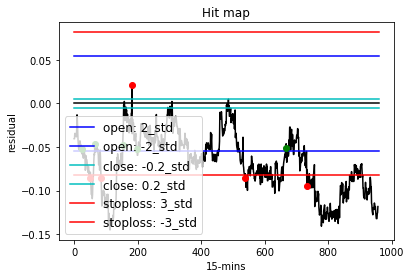

Testing PnL: 0 Testing SuccesRate: 0.2 Num trade 5 Trade Frequency 0.5020876826722338 Ret -2.3769310736884437e-05 Sharpe Ratio -0.4621583530827309
ORA/OZL
Maximum PnL: 22963.372710437532 Optimal open: 2.5 optimal close: -0.2 optimal_stoploss: 3


<ipython-input-310-ec2c7b8f58da>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


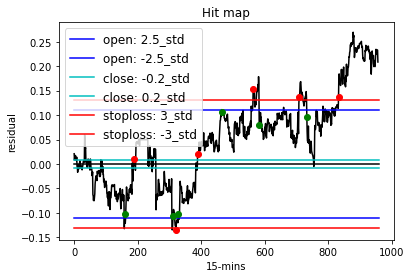

Testing PnL: 0 Testing SuccesRate: 0.3333333333333333 Num trade 6 Trade Frequency 0.4394572025052192 Ret 1.817673721590284e-05 Sharpe Ratio 0.23712095223951027
CKF/JBH
Maximum PnL: 0 Optimal open: 0 optimal close: 0 optimal_stoploss: 0


<ipython-input-310-ec2c7b8f58da>:80: RuntimeWarning: divide by zero encountered in double_scalars
  Sharpe_Ratio1 = (np.mean(returnlist) - 0.02 / 252 / 24 / 4) / np.std(returnlist)
<ipython-input-310-ec2c7b8f58da>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


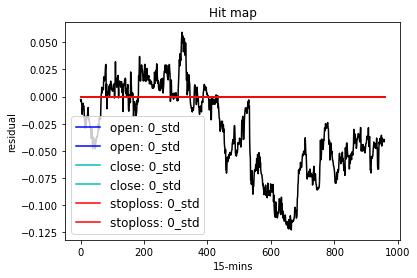

Testing PnL: 0 Testing SuccesRate: 0 Num trade 0 Trade Frequency 0.0 Ret 0.0 Sharpe Ratio -inf
RRL/SLR


<ipython-input-310-ec2c7b8f58da>:80: RuntimeWarning: divide by zero encountered in double_scalars
  Sharpe_Ratio1 = (np.mean(returnlist) - 0.02 / 252 / 24 / 4) / np.std(returnlist)


Maximum PnL: 33.05987129138202 Optimal open: 1 optimal close: -0.2 optimal_stoploss: 2


<ipython-input-310-ec2c7b8f58da>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


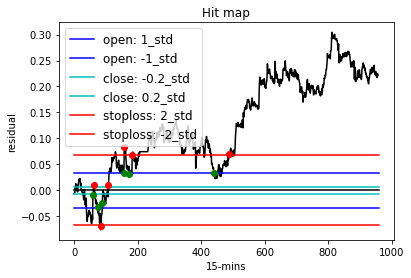

Testing PnL: 0 Testing SuccesRate: 0.3333333333333333 Num trade 6 Trade Frequency 0.09081419624217119 Ret -3.6476629157614924e-05 Sharpe Ratio -1.2272797963042266
ILU/MIN
Maximum PnL: 91.49703444944932 Optimal open: 3 optimal close: -0.2 optimal_stoploss: 3


<ipython-input-310-ec2c7b8f58da>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


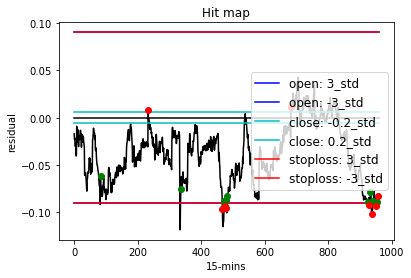

Testing PnL: 8.126419765211482 Testing SuccesRate: 0.2222222222222222 Num trade 9 Trade Frequency 0.5219206680584552 Ret 3.47155617623109e-05 Sharpe Ratio 0.725934677773105
ILU/LYC
Maximum PnL: 53.405347315787246 Optimal open: 2 optimal close: -0.2 optimal_stoploss: 2


<ipython-input-310-ec2c7b8f58da>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


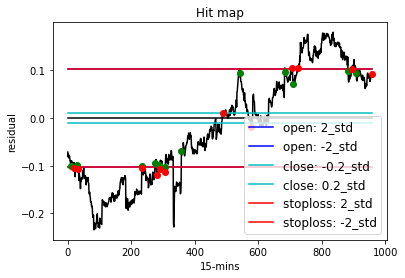

Testing PnL: 2.6570906489927713 Testing SuccesRate: 0.16666666666666666 Num trade 12 Trade Frequency 0.29123173277661796 Ret 2.570700337010881e-05 Sharpe Ratio 0.7337003075778579
BSL/JHX


<ipython-input-310-ec2c7b8f58da>:80: RuntimeWarning: divide by zero encountered in double_scalars
  Sharpe_Ratio1 = (np.mean(returnlist) - 0.02 / 252 / 24 / 4) / np.std(returnlist)


Maximum PnL: 30.9791061803061 Optimal open: 1 optimal close: -0.2 optimal_stoploss: 3


<ipython-input-310-ec2c7b8f58da>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


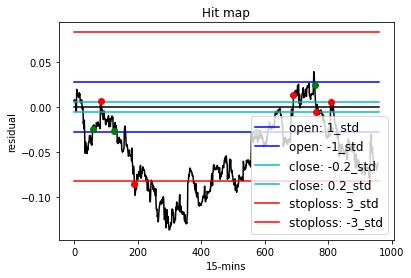

Testing PnL: 0 Testing SuccesRate: 0.8 Num trade 5 Trade Frequency 0.22338204592901878 Ret 3.399451189905918e-05 Sharpe Ratio 0.9408356602230534
BKW/JHX
Maximum PnL: 0 Optimal open: 0 optimal close: 0 optimal_stoploss: 0


<ipython-input-310-ec2c7b8f58da>:80: RuntimeWarning: divide by zero encountered in double_scalars
  Sharpe_Ratio1 = (np.mean(returnlist) - 0.02 / 252 / 24 / 4) / np.std(returnlist)
<ipython-input-310-ec2c7b8f58da>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


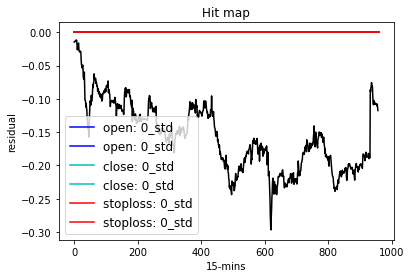

Testing PnL: 0 Testing SuccesRate: 0 Num trade 0 Trade Frequency 0.0 Ret 0.0 Sharpe Ratio -inf
FLT/WEB
Maximum PnL: 61.311178720695935 Optimal open: 2.5 optimal close: -0.2 optimal_stoploss: 3


<ipython-input-310-ec2c7b8f58da>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


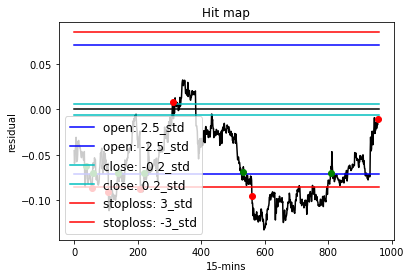

Testing PnL: 128.51054126983468 Testing SuccesRate: 0.16666666666666666 Num trade 6 Trade Frequency 0.42588726513569936 Ret 2.073253595900048e-05 Sharpe Ratio 0.340874037037796
DMP/JBH
Maximum PnL: 23.002517185600677 Optimal open: 1.5 optimal close: -0.2 optimal_stoploss: 2


<ipython-input-310-ec2c7b8f58da>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


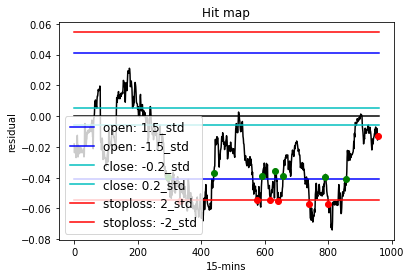

Testing PnL: 30.019870089938166 Testing SuccesRate: 0.0 Num trade 7 Trade Frequency 0.42171189979123175 Ret -3.679273992818336e-05 Sharpe Ratio -1.1972007922428434
         InSample_PnL         PnL  success_rate  Num_of_Trade  \
GOZ/SCG     29.990160    0.000000      0.200000             5   
ORA/OZL  22963.372710    0.000000      0.333333             6   
CKF/JBH      0.000000    0.000000      0.000000             0   
RRL/SLR     33.059871    0.000000      0.333333             6   
ILU/MIN     91.497034    8.126420      0.222222             9   
ILU/LYC     53.405347    2.657091      0.166667            12   
BSL/JHX     30.979106    0.000000      0.800000             5   
BKW/JHX      0.000000    0.000000      0.000000             0   
FLT/WEB     61.311179  128.510541      0.166667             6   
DMP/JBH     23.002517   30.019870      0.000000             7   

         trade_frequency    Return  Sharpe_Ratio  winner_PnL  loser_PnL  
GOZ/SCG         0.502088 -0.000024     -0.4621

In [321]:
for pairs,test_value in Top_pairs:
    returnplot=[]
    print(pairs)
    stock1=pairs.split('/')[0]
    stock2=pairs.split('/')[1]
    X=training_df.loc[:,stock1].tolist()
    Y=training_df.loc[:,stock2].tolist()
    
    #TLS regression to determine the hedge ratio
    linear = odrpack.Model(f) #initialize the model odr
    mydata = odrpack.RealData(X, Y)
    myodr = odrpack.ODR(mydata, linear, beta0=[1., 2.])
    myoutput = myodr.run()
    #Rolling OLS to determine hedge ratio
    from statsmodels.regression.rolling import RollingOLS
    endog=Y
    exog=sm.add_constant(X)
    rols=RollingOLS(endog,exog,window=20)
    rres=rols.fit()
    
    intercept=myoutput.beta[1]
    #intercept =rres.params[0]
   
    slope = myoutput.beta[0] 
   # slope=rres.params[1]

    residual = [] #spread calculation
    for i in range(len(X)):
        residual.append(Y[i] - slope * X[i] - intercept)
    sd = np.std(residual)
    #Parameter that will be loop to find the most optimal P&L
    open_level = [1, 1.5, 2, 2.5
                  , 3]
    close_level = [-0.2, -0.1, 0, 0.1, 0.2]
    stoploss_level = [2, 3, 4, 5, 6]
    #List to save the optimal open,stoploss and close position
    optimal_open = 0
    optimal_stoploss = 0
    optimal_close = 0
    #test the strategy
    max_PnL = 0
    #create adf to store the list of al possible trade happen in open and close
    info_df = pd.DataFrame(np.arange(len(open_level) * len(close_level) * len(stoploss_level) *
                                     len(info_columns)).reshape(len(open_level) * len(close_level) * len(stoploss_level), len(info_columns)),
                           index=range(len(open_level) * len(close_level) * len(stoploss_level)), columns=info_columns)
    num = 0
    #loop and find the most optimal stoploss,open and  close position 
    for open1 in open_level:
        for close in close_level:
            for stoploss in stoploss_level:
                PnL, success_rate, Num_of_Trade, trade_frequency, Return, Sharpe_Ratio, winner_PnL, loser_PnL = pnl(X, Y, slope, intercept, sd, open1, close, stoploss, 0, 10000)
                info_df.loc[num, 'open'] = open1
                info_df.loc[num, 'close'] = close
                info_df.loc[num, 'stoploss'] = stoploss
                info_df.loc[num, 'PnL'] = PnL
                info_df.loc[num, 'success_rate'] = success_rate
                info_df.loc[num, 'Num_of_Trade'] = Num_of_Trade
                info_df.loc[num, 'trade_frequency'] = trade_frequency
                info_df.loc[num, 'Return'] = Return
                info_df.loc[num, 'Sharpe_Ratio'] = Sharpe_Ratio
                info_df.loc[num, 'winner_PnL'] = winner_PnL
                info_df.loc[num, 'loser_PnL'] = loser_PnL
                num = num + 1
                if PnL > max_PnL:
                    max_PnL = PnL
                    optimal_open = open1
                    optimal_stoploss = stoploss
                    optimal_close = close
    print("Maximum PnL:",max_PnL,"Optimal open:",optimal_open,"optimal close:",optimal_close,"optimal_stoploss:",optimal_stoploss)
    #Testing Set Implementation with the optimal time. In cal pnl tag=1 to show the graph
    X1 = test_df.loc[:, stock1].tolist()
    Y1 = test_df.loc[:, stock2].tolist()
    test_PnL, test_success_rate, test_Num_of_Trade, test_trade_frequency, test_Return, test_Sharpe_Ratio, test_winner_PnL, test_loser_PnL = pnl(X1, Y1, slope, intercept, sd, optimal_open, optimal_close, optimal_stoploss, 1, 10000)
    print("Testing PnL:",test_PnL,"Testing SuccesRate:", test_success_rate,"Num trade", test_Num_of_Trade,"Trade Frequency", test_trade_frequency,"Ret", test_Return,"Sharpe Ratio", test_Sharpe_Ratio)
    result_df.loc[pairs, 'InSample_PnL'] = max_PnL
    result_df.loc[pairs, 'PnL'] = test_PnL
    result_df.loc[pairs, 'success_rate'] = test_success_rate
    result_df.loc[pairs, 'Num_of_Trade'] = test_Num_of_Trade
    result_df.loc[pairs, 'trade_frequency'] = test_trade_frequency
    result_df.loc[pairs, 'Return'] = test_Return
    result_df.loc[pairs, 'Sharpe_Ratio'] = test_Sharpe_Ratio
    result_df.loc[pairs, 'winner_PnL'] = test_winner_PnL
    result_df.loc[pairs, 'loser_PnL'] = test_loser_PnL
    returnplot.append()
print(result_df)

In [229]:
##Test for 2nd strategy
#pairs_data

PDL/LLC
Maximum PnL: 0 Optimal open: 0 optimal close: 0 optimal_stoploss: 0


<ipython-input-177-57a3281e6d99>:80: RuntimeWarning: divide by zero encountered in double_scalars
  Sharpe_Ratio1 = (np.mean(returnlist) - 0.03 / 252 / 24 / 4) / np.std(returnlist)
<ipython-input-177-57a3281e6d99>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


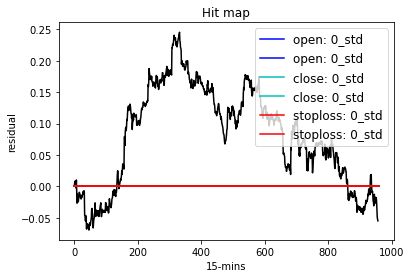

Testing PnL: 0 Testing SuccesRate: 0 Num trade 0 Trade Frequency 0.0 Ret 0.0 Sharpe Ratio -inf
MPL/GPT
Maximum PnL: 0 Optimal open: 0 optimal close: 0 optimal_stoploss: 0


<ipython-input-177-57a3281e6d99>:80: RuntimeWarning: divide by zero encountered in double_scalars
  Sharpe_Ratio1 = (np.mean(returnlist) - 0.03 / 252 / 24 / 4) / np.std(returnlist)
<ipython-input-177-57a3281e6d99>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


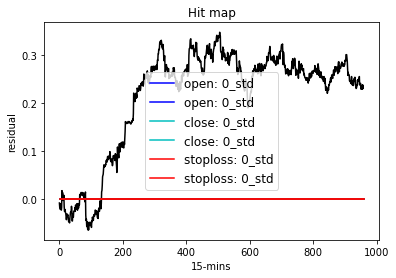

Testing PnL: 0 Testing SuccesRate: 0 Num trade 0 Trade Frequency 0.0 Ret 0.0 Sharpe Ratio -inf
MPL/DXS
Maximum PnL: 26.933219591466685 Optimal open: 2 optimal close: -0.2 optimal_stoploss: 2


<ipython-input-177-57a3281e6d99>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


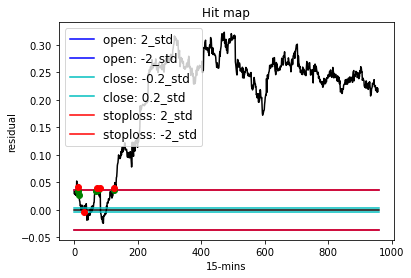

Testing PnL: 0 Testing SuccesRate: 0.2 Num trade 5 Trade Frequency 0.029227557411273485 Ret 0.0 Sharpe Ratio 0.27968121162441395
GUD/CSR
Maximum PnL: 10.614501199784211 Optimal open: 1 optimal close: 0.1 optimal_stoploss: 2


<ipython-input-177-57a3281e6d99>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


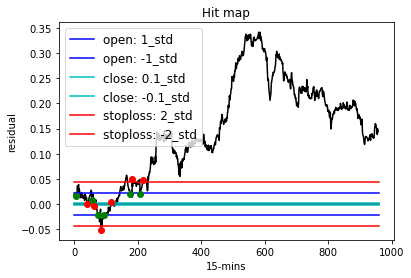

Testing PnL: 0 Testing SuccesRate: 0.5 Num trade 6 Trade Frequency 0.09290187891440502 Ret 0.0 Sharpe Ratio -0.5212298449833391
GMG/UMG
Maximum PnL: 0 Optimal open: 0 optimal close: 0 optimal_stoploss: 0


<ipython-input-177-57a3281e6d99>:80: RuntimeWarning: divide by zero encountered in double_scalars
  Sharpe_Ratio1 = (np.mean(returnlist) - 0.03 / 252 / 24 / 4) / np.std(returnlist)
<ipython-input-177-57a3281e6d99>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


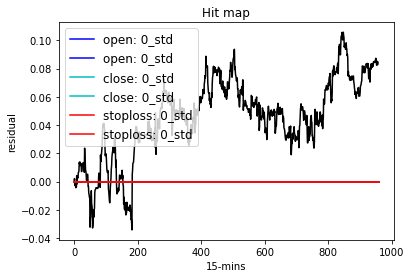

Testing PnL: 0 Testing SuccesRate: 0 Num trade 0 Trade Frequency 0.0 Ret 0.0 Sharpe Ratio -inf
MPL/ALQ
Maximum PnL: 0 Optimal open: 0 optimal close: 0 optimal_stoploss: 0


<ipython-input-177-57a3281e6d99>:80: RuntimeWarning: divide by zero encountered in double_scalars
  Sharpe_Ratio1 = (np.mean(returnlist) - 0.03 / 252 / 24 / 4) / np.std(returnlist)
<ipython-input-177-57a3281e6d99>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


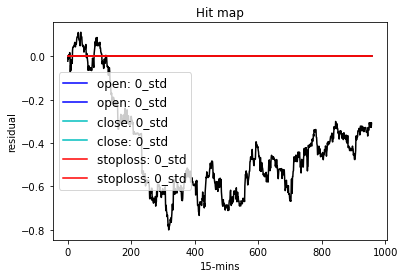

Testing PnL: 0 Testing SuccesRate: 0 Num trade 0 Trade Frequency 0.0 Ret 0.0 Sharpe Ratio -inf
MPL/MIN
Maximum PnL: 115.2234111555723 Optimal open: 1.5 optimal close: -0.2 optimal_stoploss: 3


<ipython-input-177-57a3281e6d99>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


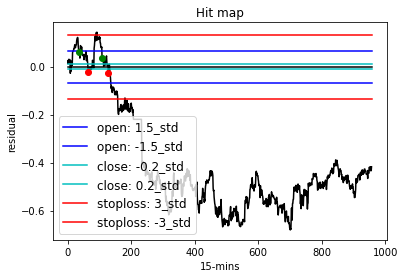

Testing PnL: 0 Testing SuccesRate: 1.0 Num trade 2 Trade Frequency 0.05010438413361169 Ret 0.0 Sharpe Ratio 1.3077162777771425
MPL/AMP
Maximum PnL: 0 Optimal open: 0 optimal close: 0 optimal_stoploss: 0


<ipython-input-177-57a3281e6d99>:80: RuntimeWarning: divide by zero encountered in double_scalars
  Sharpe_Ratio1 = (np.mean(returnlist) - 0.03 / 252 / 24 / 4) / np.std(returnlist)
<ipython-input-177-57a3281e6d99>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


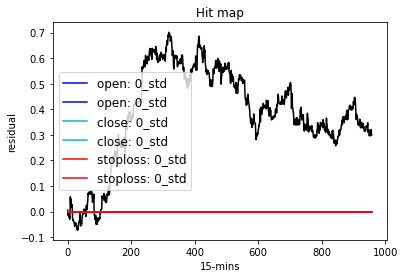

Testing PnL: 0 Testing SuccesRate: 0 Num trade 0 Trade Frequency 0.0 Ret 0.0 Sharpe Ratio -inf
MPL/FMG
Maximum PnL: 159.58428693006002 Optimal open: 1 optimal close: -0.1 optimal_stoploss: 3


<ipython-input-177-57a3281e6d99>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


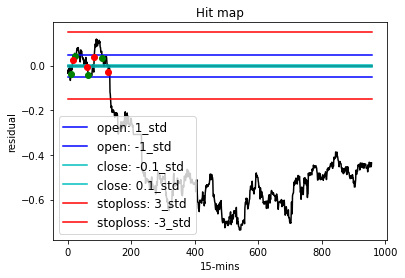

Testing PnL: 0 Testing SuccesRate: 1.0 Num trade 4 Trade Frequency 0.08559498956158663 Ret 0.0 Sharpe Ratio 1.6859005852822975
NXT/WHC
Maximum PnL: 61.927912918646086 Optimal open: 1 optimal close: -0.2 optimal_stoploss: 2


<ipython-input-177-57a3281e6d99>:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


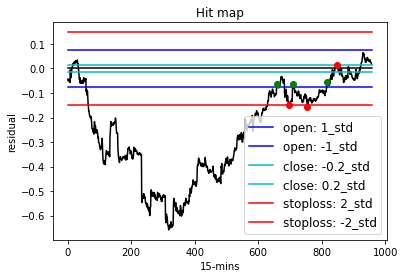

Testing PnL: 0 Testing SuccesRate: 0.3333333333333333 Num trade 3 Trade Frequency 0.11795407098121086 Ret 0.0 Sharpe Ratio -0.9601278701951668
         InSample_PnL  PnL  success_rate  Num_of_Trade  trade_frequency  \
PDL/LLC      0.000000    0      0.000000             0         0.000000   
MPL/GPT      0.000000    0      0.000000             0         0.000000   
MPL/DXS     26.933220    0      0.200000             5         0.029228   
GUD/CSR     10.614501    0      0.500000             6         0.092902   
GMG/UMG      0.000000    0      0.000000             0         0.000000   
MPL/ALQ      0.000000    0      0.000000             0         0.000000   
MPL/MIN    115.223411    0      1.000000             2         0.050104   
MPL/AMP      0.000000    0      0.000000             0         0.000000   
MPL/FMG    159.584287    0      1.000000             4         0.085595   
NXT/WHC     61.927913    0      0.333333             3         0.117954   

         Return  Sharpe_Ratio  

In [231]:
for pairs,test_value in pairs_data[:10]:
    pairs=pairs[0]+"/"+pairs[1]
    print(pairs)
    stock1=pairs.split('/')[0]
    stock2=pairs.split('/')[1]
    X=training_df.loc[:,stock1].tolist()
    Y=training_df.loc[:,stock2].tolist()
    
    #TLS regression to determine the hedge ratio
    linear = odrpack.Model(f) #initialize the model odr
    mydata = odrpack.RealData(X, Y)
    myodr = odrpack.ODR(mydata, linear, beta0=[1., 2.])
    myoutput = myodr.run()
    #Rolling OLS to determine hedge ratio
    from statsmodels.regression.rolling import RollingOLS
    endog=Y
    exog=sm.add_constant(X)
    rols=RollingOLS(endog,exog,window=20)
    rres=rols.fit()
    
    intercept=myoutput.beta[1]
    #intercept =rres.params[0]
   
    
    slope = myoutput.beta[0] 
   # slope=rres.params[1]

    residual = [] #spread calculation
    for i in range(len(X)):
        residual.append(Y[i] - slope * X[i] - intercept)
    sd = np.std(residual)
    #Parameter that will be loop to find the most optimal P&L
    open_level = [1, 1.5, 2, 2.5
                  , 3]
    close_level = [-0.2, -0.1, 0, 0.1, 0.2]
    stoploss_level = [2, 3, 4, 5, 6]
    #List to save the optimal open,stoploss and close position
    optimal_open = 0
    optimal_stoploss = 0
    optimal_close = 0
    #test the strategy
    max_PnL = 0
    #create adf to store the list of al possible trade happen in open and close
    info_df = pd.DataFrame(np.arange(len(open_level) * len(close_level) * len(stoploss_level) *
                                     len(info_columns)).reshape(len(open_level) * len(close_level) * len(stoploss_level), len(info_columns)),
                           index=range(len(open_level) * len(close_level) * len(stoploss_level)), columns=info_columns)
    num = 0
    #loop and find the most optimal stoploss,open and  close position 
    for open1 in open_level:
        for close in close_level:
            for stoploss in stoploss_level:
                PnL, success_rate, Num_of_Trade, trade_frequency, Return, Sharpe_Ratio, winner_PnL, loser_PnL = pnl(X, Y, slope, intercept, sd, open1, close, stoploss, 0, 10000)
                info_df.loc[num, 'open'] = open1
                info_df.loc[num, 'close'] = close
                info_df.loc[num, 'stoploss'] = stoploss
                info_df.loc[num, 'PnL'] = PnL
                info_df.loc[num, 'success_rate'] = success_rate
                info_df.loc[num, 'Num_of_Trade'] = Num_of_Trade
                info_df.loc[num, 'trade_frequency'] = trade_frequency
                info_df.loc[num, 'Return'] = Return
                info_df.loc[num, 'Sharpe_Ratio'] = Sharpe_Ratio
                info_df.loc[num, 'winner_PnL'] = winner_PnL
                info_df.loc[num, 'loser_PnL'] = loser_PnL
                num = num + 1
                if PnL > max_PnL:
                    max_PnL = PnL
                    optimal_open = open1
                    optimal_stoploss = stoploss
                    optimal_close = close
    print("Maximum PnL:",max_PnL,"Optimal open:",optimal_open,"optimal close:",optimal_close,"optimal_stoploss:",optimal_stoploss)
    #Testing Set Implementation with the optimal time. In cal pnl tag=1 to show the graph
    X1 = test_df.loc[:, stock1].tolist()
    Y1 = test_df.loc[:, stock2].tolist()
    test_PnL, test_success_rate, test_Num_of_Trade, test_trade_frequency, test_Return, test_Sharpe_Ratio, test_winner_PnL, test_loser_PnL = pnl(X1, Y1, slope, intercept, sd, optimal_open, optimal_close, optimal_stoploss, 1, 10000)
    print("Testing PnL:",test_PnL,"Testing SuccesRate:", test_success_rate,"Num trade", test_Num_of_Trade,"Trade Frequency", test_trade_frequency,"Ret", test_Return,"Sharpe Ratio", test_Sharpe_Ratio)
    result_df.loc[pairs, 'InSample_PnL'] = max_PnL
    result_df.loc[pairs, 'PnL'] = test_PnL
    result_df.loc[pairs, 'success_rate'] = test_success_rate
    result_df.loc[pairs, 'Num_of_Trade'] = test_Num_of_Trade
    result_df.loc[pairs, 'trade_frequency'] = test_trade_frequency
    result_df.loc[pairs, 'Return'] = test_Return
    result_df.loc[pairs, 'Sharpe_Ratio'] = test_Sharpe_Ratio
    result_df.loc[pairs, 'winner_PnL'] = test_winner_PnL
    result_df.loc[pairs, 'loser_PnL'] = test_loser_PnL

print(result_df)

## K-means Clustering (Another approach compare to cointegration)

In [330]:
#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA


In [323]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

## prediction period setting

In [324]:
look_back=1

In [325]:
scaler=MinMaxScaler(feature_range=(0,1))
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i, :]
        dataX.append(a)
        dataY.append(dataset[(i+1):(i+1+look_back), 0])
    print(len(dataY))
    return dataX, np.array(scaler.fit_transform(dataX)), dataY, np.array(scaler.fit_transform(dataY))

In [326]:
#Generate data set for train x train y test x and test y


## Spread prediction using Kalman Filters (Linear Qudratic Estimation)

In [293]:
from pykalman import KalmanFilter

In [294]:
def KalmanFilterAverage(x):
  # Construct a Kalman filter
    kf = KalmanFilter(transition_matrices = [1],observation_matrices = [1],initial_state_mean = 0,initial_state_covariance = 1,observation_covariance=1,transition_covariance=.01)
    #kf = KalmanFilter(initial_state_mean=0, n_dim_obs=2) 
  # Use the observed values of the price to get a rolling mean
    state_means, _ = kf.filter(x.values)
    state_means = pd.Series(state_means.flatten(), index=x.index)
    return state_means
 
# Kalman filter regression
def KalmanFilterRegression(x,y):
    delta = 1e-3
    trans_cov = delta / (1 - delta) * np.eye(2) # How much random walk wiggles
    obs_mat = np.expand_dims(np.vstack([[x], [np.ones(len(x))]]).T, axis=1)
 
    kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
    initial_state_mean=[0,0],
    initial_state_covariance=np.ones((2, 2)),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat,
    observation_covariance=2,
    transition_covariance=trans_cov)
 
    # Use the observations y to get running estimates and errors for the state parameters
    state_means, state_covs = kf.filter(y.values)
    return state_means

In [299]:
def normalize(series):
    return (series - np.mean(series)) / np.std(series)

In [272]:
for pairs,tval in Top_pairs:
    #print(pairs.split('/')[0],pairs.split('/')[1])
    training_df[[pairs.split('/')[0],pairs.split('/')[1]]]

In [301]:
for pairs,tval in Top_pairs:
    state_means=-KalmanFilterRegression(KalmanFilterAverage(training_df[pairs.split('/')[0]]),KalmanFilterAverage(training_df[pairs.split('/')[1]]))[:,0]
    results = normalize(training_df[pairs.split('/')[0]]+ (training_df[pairs.split('/')[1]] * state_means))
    forecast = results[-len(test_df):].values
    yhat_KF = forecast
    yhat_KF_mse = []
    mse = 0.0
    if look_back == 1:
        for i in range(len(forecast)):
            temp = []
            temp.append(forecast[i])
            yhat_KF_mse.append(np.array(temp))
        mse = acc_metric(normalize(testY_untr), yhat_KF_mse)
    else:
        mse = 0.0
    print(pairs,"MSE:",mse)   

NameError: name 'testX' is not defined

In [282]:
Top_pairs

[('GOZ/SCG', -4.468065327273938),
 ('ORA/OZL', -4.304669498232336),
 ('CKF/JBH', -4.283639073592157),
 ('RRL/SLR', -4.201341930904879),
 ('ILU/MIN', -4.098758453239515),
 ('ILU/LYC', -3.9822219041368254),
 ('BSL/JHX', -3.431409156517196),
 ('BKW/JHX', -3.384732528678332),
 ('FLT/WEB', -3.3685820741773),
 ('DMP/JBH', -3.2482770707417066)]

0      1.192406
1      1.190888
2      1.187843
3      1.184790
4      1.184790
         ...   
953    1.177115
954    1.178655
955    1.177115
956    1.177115
957    1.178655
Name: GOZ, Length: 958, dtype: float64